# 자료의 분포 - 시각화와 요약 통계량 - 연습

이 노트북은 자료의 분포에 대한 시각화를 이용한 탐색적 분석과 요약 통계량을 구하는 연습입니다.

교과서에서 본 체력 측정자료에서 우리가 공부한 키, 몸무게와 같은 자료는 평균을 중심으로 대칭인 분포를 가지는 자료입니다. 

이번 연습에 사용될 자료는 서울특별시 공공자전거 대여 [이력 자료](https://data.seoul.go.kr/dataList/OA-20447/A/1/datasetView.do)를 이용할 것입니다. **분석할 변수는 자전거 이용 시간(`duration`, 분)과 거리(`distance`, m)** 입니다. 시간과 거리의 분포는 체력 자료와 매우 다른 분포를 가지는 것을 볼 수 있습니다.

먼저 분석에 필요한 라이브러리를 불러오고 한글 처리에 필요한 코드를 실행합니다.

In [1]:
# 라이므러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 그림 그리기를 위한 코드
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

# clolab 에서 그림을 그릴 때 한글을 사용하려면 필요한 코드입니다. 
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False 

# 그림 크기 조정 
plt.rcParams["figure.figsize"] = (8,8)   


## 1. 자료불러오기 

자료는 두 개의 화일로 구성됩니다. 자료는 [서울시 열린데이터 광장 사이트](https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do#)에서 다운로드받은 자료입니다. 

 - 서울시 공공 자전거 대여 이력 자료(2019년 9월 한달 자료) 
 - 서울시 공공 자전거 대여소 정보 자료 (2021년 6월의 대여서 현황자료)

**참고**: 최근 2020년 자료도 있지만 자료의 크기가 다소 크기 때문에 `colab` 을 이용할 시 시간이 오래 걸립니다. 관심있는 사람들은 최근자료를 다운로드 받아 아래 제시된 코드를 이용하여 실습해보세요. 


 ### 서울시 공공 자전거 대여 이력 자료 불러 오기
 
 1. 먼저 서울시 공공 자전거 대여 이력 자료를 불러 들여 데이터프레임 `bike0` 에 저장
 2. 열이름을 영문으로 바꾸고 열이름에 대한 정보를 가진 데이터프레임 `col_info`를 생성 
 3. 대여시간에 대한 두 개의 변수를 시간 변수로 변환 

In [3]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike0 = pd.read_csv(url1, encoding="CP949")

In [4]:
bike0.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [5]:
bike0.shape

(407589, 11)

In [6]:
bike0.dtypes

자전거번호        object
대여일시         object
대여 대여소번호      int64
대여 대여소명      object
대여거치대         int64
반납일시         object
반납대여소번호       int64
반납대여소명       object
반납거치대         int64
이용시간          int64
이용거리        float64
dtype: object

In [7]:
colnames_old = bike0.columns
colnames_new = ["bike_ID", "time_start","station_ID_start", "station_name_start", "spot_ID_start", "time_end", "station_ID_end", "station_name_end", "sopt_ID_end","duration", "distance"]

In [8]:
col_info = pd.DataFrame({ 'col_korean':colnames_old , 'col_english':colnames_new })

In [9]:
col_info # 열이름 정보를 가진 데이처프레임

,col_korean,col_english
0,자전거번호,bike_ID
1,대여일시,time_start
2,대여 대여소번호,station_ID_start
3,대여 대여소명,station_name_start
4,대여거치대,spot_ID_start
5,반납일시,time_end
6,반납대여소번호,station_ID_end
7,반납대여소명,station_name_end
8,반납거치대,sopt_ID_end
9,이용시간,duration


In [10]:
# 열이름 바꾸기
bike0.columns = colnames_new
# 시간이 포함된 문자열의 형식을 시간형식으로 바꾸기   
bike0['time_start'] = pd.to_datetime(bike0['time_start'], format='%Y-%m-%d %H:%M:%S')
bike0['time_end'] = pd.to_datetime(bike0['time_end'], format='%Y-%m-%d %H:%M:%S')

In [11]:
bike0.head(10)

,bike_ID,time_start,station_ID_start,station_name_start,spot_ID_start,time_end,station_ID_end,station_name_end,sopt_ID_end,duration,distance
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [12]:
bike0.dtypes

bike_ID                       object
time_start            datetime64[ns]
station_ID_start               int64
station_name_start            object
spot_ID_start                  int64
time_end              datetime64[ns]
station_ID_end                 int64
station_name_end              object
sopt_ID_end                    int64
duration                       int64
distance                     float64
dtype: object

### 서울시 공공 자전거 대여소 정보 자료 불러오기

대여소 정보를 가진 자료(`seoul_bike_stations_202106.csv`)에는 대여소의 ID, 대여소 이름과 대여소가 있는 주소와 공간적 위치에 대한 정보로 구성되어 있습니다.

자료는 [서울시 열린데이터 광장 사이트](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)에서 다운로드 받은 자료입니다. 최근 자료도 다운로드 받을 수 있습니다.

In [13]:
url2 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_stations_202106.csv"
bike_station00 = pd.read_csv(url2, encoding="CP949", header=None)

In [14]:
bike_station00.head(10)

,0,1,2,3,4,5,6,7,8,9
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD
5,107,신한은행 서교동금융센터점 앞,마포구,서울특별시 마포구 월드컵북로 35,37.557510,126.918503,2015-09-06,5.0,NaN,LCD
6,108,서교동 사거리,마포구,서울특별시 마포구 양화로 93,37.552746,126.918617,2015-09-06,10.0,NaN,LCD
7,109,제일빌딩 앞,마포구,서울특별시 마포구 어울마당로 26,37.547691,126.919983,2015-09-07,10.0,NaN,LCD
8,111,상수역 2번출구 앞,마포구,서울특별시 마포구 와우산로 40,37.547871,126.923531,2015-09-07,10.0,NaN,LCD
9,112,극동방송국 앞,마포구,서울특별시 마포구 와우산로 56,37.549202,126.923203,2015-09-07,10.0,NaN,LCD


In [15]:
bike_station00.shape

(2467, 10)

이제 대여소에 대한 정보가 있는 데이터프레임에 다음과 같은 작업을 적용하여 필요한 자료만 슬라이싱합니다.


1. 대여소 ID 와 행정구 이름, 2개의 열(열의 index는 0 과 2)을 선택하고 열이름을 영문으로 변경합니다.
1. 결과를 데이터프레임 `bike_station0` 으로 저장합니다.

In [16]:
bike_station0 = bike_station00.iloc[:,[0,2]]
bike_station0.columns = ["station_ID_start", "gu_name_start" ]

In [17]:
bike_station0

,station_ID_start,gu_name_start
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2462,4864,송파구
2463,4865,송파구
2464,4867,송파구
2465,4868,송파구


## 2. 자료의 결합


1. 이제 공공자전거 대여 이력 정보를 가진 데이터프레임(`bike0`)와 대여소의 정보를 가진 데이터프레임(`bike_station0`)을 대여소(`station_ID_start`)를 기준으로 결합(merger)하여 새로운 데이터프레임 `bike1`을 만듭니다.
2. 필요한 변수만 선택하여 분석을 위한 최종 데이터프레임 `bike_final`를 만듭니다.


In [18]:
bike1 = pd.merge(bike0, bike_station0, on ="station_ID_start", how='left' ) 
bike_final= bike1[["time_start","station_ID_start", "station_name_start","gu_name_start","time_end", "station_ID_end", "station_name_end", "duration", "distance" ]]

In [19]:
bike_final.head(10)

,time_start,station_ID_start,station_name_start,gu_name_start,time_end,station_ID_end,station_name_end,duration,distance
0,2019-09-28 16:10:55,368,SK 서린빌딩 앞,종로구,2019-09-28 17:03:32,2002,노들역 1번출구,52,8940.0
1,2019-09-28 16:48:16,2024,상도역 1번출구,동작구,2019-09-28 17:03:44,2002,노들역 1번출구,15,1910.0
2,2019-09-28 16:59:54,2002,노들역 1번출구,동작구,2019-09-28 17:03:57,2002,노들역 1번출구,2,30.0
3,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,영등포구,2019-09-28 17:10:12,2002,노들역 1번출구,98,9610.0
4,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,영등포구,2019-09-28 17:10:37,2002,노들역 1번출구,90,9450.0
5,2019-09-28 17:02:37,2003,사육신공원앞,동작구,2019-09-28 17:13:44,2002,노들역 1번출구,10,1410.0
6,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,서초구,2019-09-28 17:14:22,2002,노들역 1번출구,56,0.0
7,2019-09-28 17:04:56,2002,노들역 1번출구,동작구,2019-09-28 17:17:10,2002,노들역 1번출구,11,380.0
8,2019-09-28 16:59:45,2002,노들역 1번출구,동작구,2019-09-28 17:17:53,2002,노들역 1번출구,17,1080.0
9,2019-09-28 16:01:41,2024,상도역 1번출구,동작구,2019-09-28 17:20:44,2002,노들역 1번출구,78,13870.0


## 3. 구별 대여 횟수 비교

이제 구별로 자전거를 대여한 회수를 구해소 돗수 분포표를 구해보고 파이차트와 바차트로 비교해 봅시다.



In [20]:
bike_final.gu_name_start.value_counts()

서초구     80773
강남구     65964
관악구     53201
송파구     45516
광진구     40502
동작구     32726
성동구     18678
영등포구    13377
강서구      7642
구로구      7491
용산구      6176
강동구      5247
마포구      4622
동대문구     3968
서대문구     3287
금천구      2378
중구       1733
종로구      1374
중랑구      1343
성북구      1090
양천구       701
노원구       484
은평구       351
도봉구       102
강북구       101
Name: gu_name_start, dtype: int64

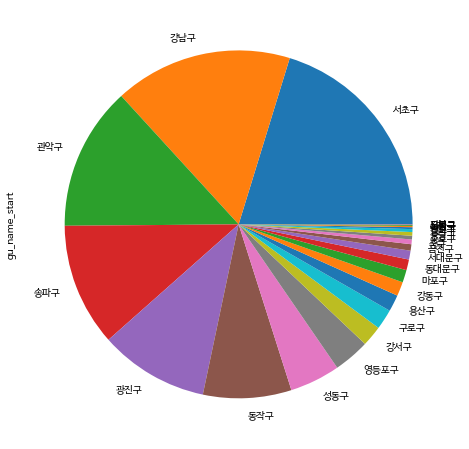

In [21]:
bike_final.gu_name_start.value_counts().plot.pie()

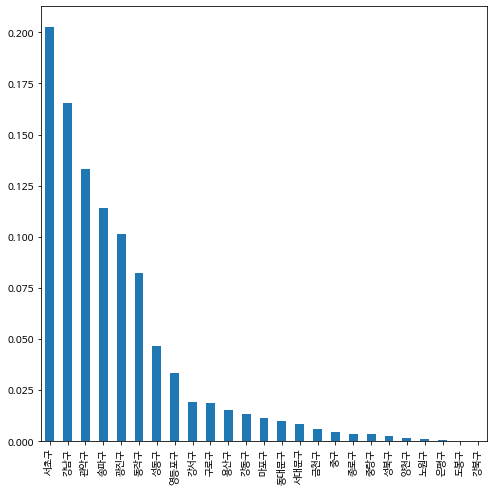

In [22]:
bike_final.gu_name_start.value_counts(normalize=True).plot.bar()

## 4. 자전거 이용시간 및 거리 분석

이제 자전거 이용시간과 거리에 대한 시각화 분석과 요약 통계량을 구해봅시다.

1. 요약 통계량
2. 히스토그램
3. 상자그림
4. 이용 시간과 거리의 산점도

자전거 이용 시간과 거리는 앞에서 말한 대로 체력 측정 자료의 분포와는 매우 다릅니다. 크기가 큰 방향, 즉 오른쪽으로 매우 치우친 분포를 보여줍니다.

특히 이동 거리의 평균(mean)과 중간값(50%, median)이 매우 차이가 나는 것을 알 수 있습니다. 왜 이렇게 차이가 나는지 생각해 봅시다. 

이용 시간과 거리의 최대값을 보면 우리가 생각한 것 보다 매우 큰 값임을 알 수 있습니다. 실제로 이용한 시간과 거리일까요?

In [23]:
bike_final[["duration", "distance"]].describe().reset_index()

,index,duration,distance
0,count,407589.000000,407589.000000
1,mean,30.156827,4253.336228
2,std,32.065934,5782.673901
3,min,1.000000,0.000000
4,25%,8.000000,1200.000000
5,50%,18.000000,2380.000000
6,75%,43.000000,5130.000000
7,max,2479.000000,153490.000000


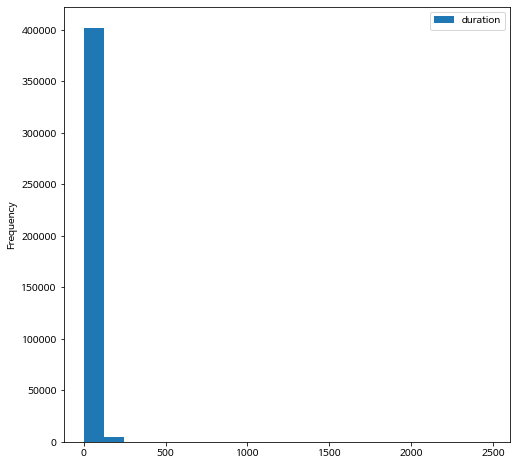

In [24]:
bike_final.plot.hist(y="duration", bins= 20)

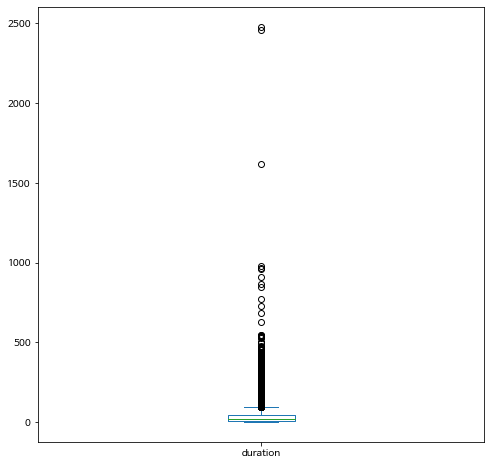

In [25]:
bike_final.plot.box(y="duration")

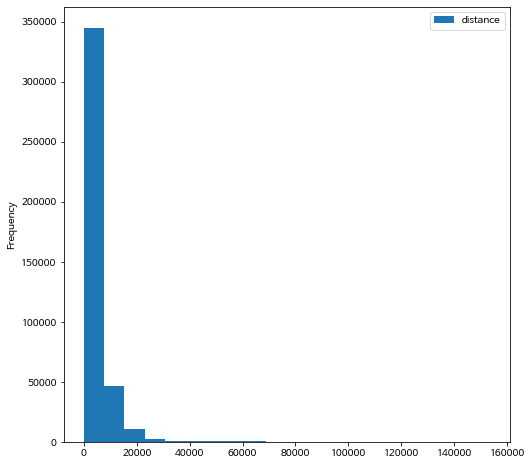

In [26]:
bike_final.plot.hist(y="distance", bins=20)

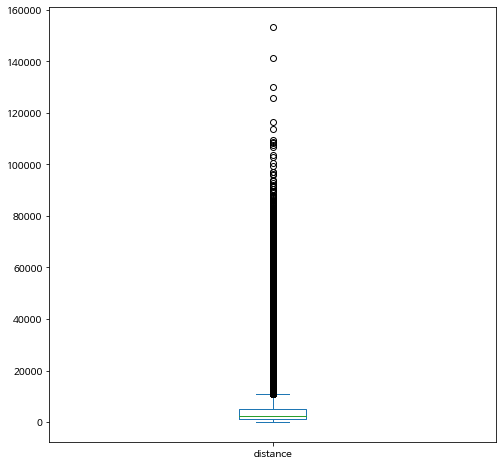

In [27]:
bike_final.plot.box(y="distance")

아래 그림은 이동거리와 시간의 관계를 산점도로 나타낸 것입니다. 

이동거리와 이동시간이 매우 큰 값들이 나타나 있는 것을 알 수 있습니다.

시각적으로 확실하게 나타나지는 않지만 이동시간이 증가하면 거리도 증가하는 경향이 나타납니다. 


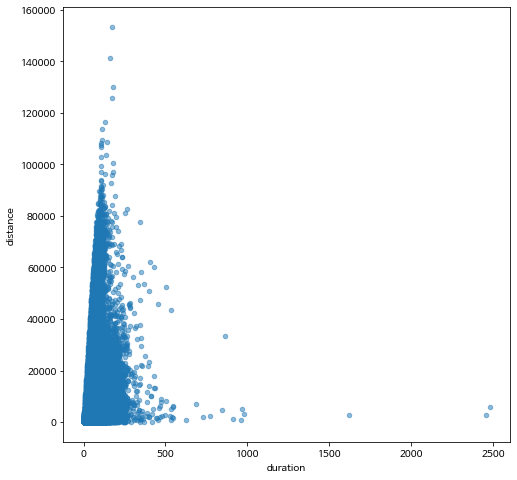

In [28]:
bike_final.plot.scatter(x='duration',y= 'distance', alpha=0.5)



이동시간(`duration`)과 이동거리(`distance`)의 분포는 오른쪽으로 매우 치우친 모양으로 나타납니다. 

이러한 현상은 비정상적으로 매우 큰 값들이 자료에 많이 포함되어 있기 때문입니다. 앞의 분포를 요약하는 그림에서 나타난 것과 같이 평균에서 멀리 떨어진 매우 큰 값들을 우리는 이상점(outlier)라고 부릅니다.

이렇게 매우 큰 값들이 포함된 자료의 분포를 파악하는 경우 자료의 값을 로그 변환(log transformation)하여 분석하면 여러 가지 유용한 점이 있습니다.

  - 이동시간와 이동거리에 값이 0이 있는 자료가 있으므로 아주 작은 수 0.1을 더해서 로그변환 합니다.
  - 로그변환 시 밑을 10을 이용하며 함수는 `numpy` 에 있는 `log10` 함수를 사용합니다.
  
  
이제 오른쪽으로 매우 치우친 분포를 가진 자료를 로그 변환하면 대칭인 분포가 나타나는 것을 알 수 잇습니다.

이동 시간과 거리의  로그 변환값에 대한  산점도를 다시 그려봅시다.

아래 코드를 실행하면 경고(warning)이 나타나지만 결과에는 이상이 없으니 그냥 무시하세요.

In [29]:
bike_final['duration_log10'] = np.log10(bike_final['duration'] + 0.1)
bike_final['distance_log10'] = np.log10(bike_final['distance'] + 0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


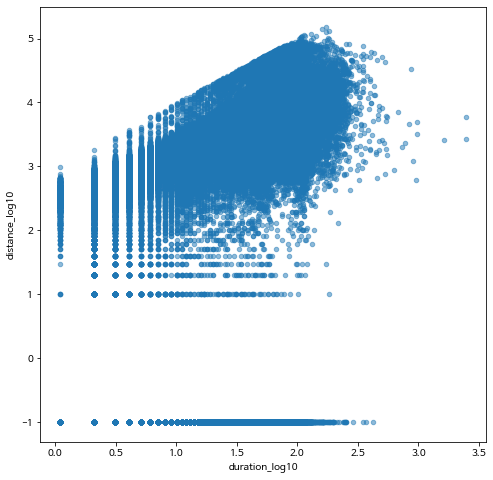

In [30]:
bike_final.plot.scatter(x='duration_log10',y= 'distance_log10', alpha=0.5)

위의 분석을 보면 거리가 0으로 된 자료가 많은 것 같습니다. 로그변환시 0.1을 더했으므로
원래 값이 0 인 자료는 로그 변환시 -1 이 됩니다.

$$ log_{10}(0+0.1) = log_{10}(0.1) = -1 $$


아마도 거리를 측정하는 센서나 계측기계에 오류가 있는 것으로 생각되어 거리가 0인 것을 제외한 데이터프레임 `bike_nozero`를 만들고 다시 분석해 봅시다.

In [31]:
bike_nozero = bike_final.loc[bike_final.distance > 0.0]

In [32]:
bike_nozero.shape

(395277, 11)

In [33]:
bike_final.shape

(407589, 11)

아래외 같이 이동거리가 0인 자료의 수는 12,312 입니다.

In [34]:
bike_final.shape[0] - bike_nozero.shape[0]

12312

이제 이동거리가 0인 자료를 제거하고 이동거리와 시간에 대한 요약통계량을 구해봅시다. 

In [35]:
bike_nozero[["duration", "distance"]].describe().reset_index()

,index,duration,distance
0,count,395277.000000,395277.000000
1,mean,30.285319,4385.818198
2,std,32.119792,5822.356670
3,min,1.000000,10.000000
4,25%,9.000000,1290.000000
5,50%,18.000000,2470.000000
6,75%,43.000000,5280.000000
7,max,2479.000000,153490.000000


또한 이동거리가 0인 자료를 제거하고  자료의 분포를 살펴봅시다.

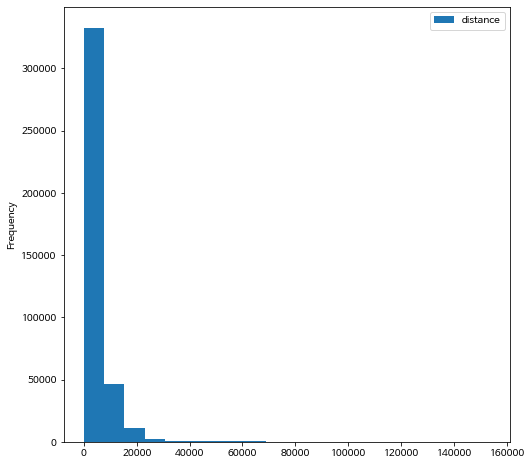

In [36]:
bike_nozero.plot.hist(y="distance", bins= 20)

로그 변환을 적용한 자료는 분포가 대칭에 가깝게 됩니다.

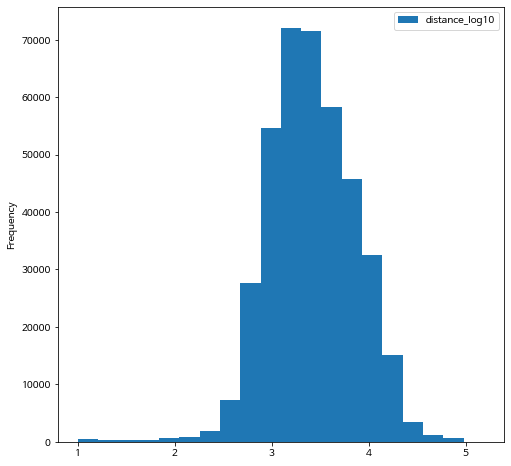

In [37]:
bike_nozero.plot.hist(y="distance_log10", bins= 20)

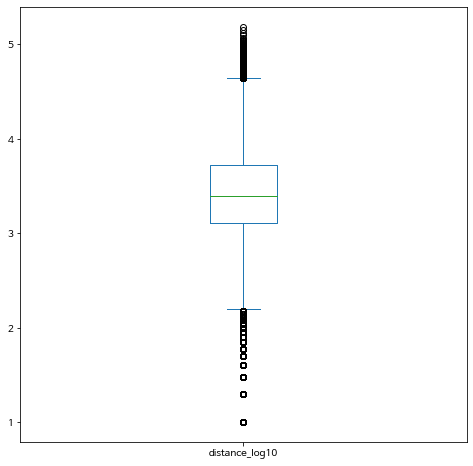

In [38]:
bike_nozero.plot.box(y="distance_log10")

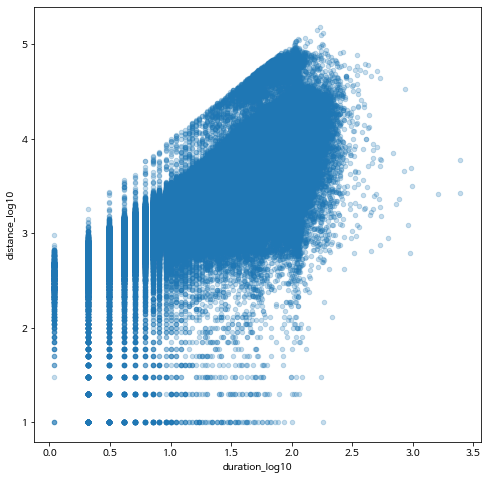

In [39]:
bike_nozero.plot.scatter(x='duration_log10',y= 'distance_log10', alpha=0.25)

## 5. 구별 자전거 이용시간 및 거리 비교

이제 구별로 자전거의 이용 시간과 거리를 비교해 봅시다. 여기서 구별로 분석하는 것은 자전거를 출발할 때 대여한 대여소가 위치는 구를 의미합니다.

1. 구별 요약 통계량 분석
2. 구별 상자그림

In [40]:
bike_nozero[["gu_name_start", "duration", "distance"]].groupby(by="gu_name_start").describe().reset_index()

gu_name_start duration                                                  \
                    count       mean        std   min   25%   50%     75%   
0            강남구  63820.0  29.363601  31.644264   1.0   8.0  17.0   41.00   
1            강동구   5113.0  36.461373  28.835377   3.0  15.0  29.0   49.00   
2            강북구    100.0  83.830000  42.500637  27.0  46.0  80.0  113.50   
3            강서구   7426.0  20.979127  28.844970   1.0   5.0   8.0   20.00   
4            관악구  51741.0  24.730929  27.278189   1.0   8.0  14.0   31.00   
5            광진구  39251.0  24.207765  28.304476   1.0   7.0  13.0   31.00   
6            구로구   7311.0  30.576255  26.481543   1.0  15.0  25.0   39.00   
7            금천구   2332.0  32.106346  28.378665   2.0  12.0  25.0   43.00   
8            노원구    472.0  72.360169  33.208176   4.0  49.0  66.0   91.00   
9            도봉구     97.0  92.474227  30.253820   5.0  69.0  92.0  113.00   
10          동대문구   3872.0  30.242252  27.763908   1.0  10.0  20.0   43.00   
11           동작구  31662.0  28.978618  33.212139   1.0   7.0  15.0   41.00   
12           마포구   4515.0  48.507420  34.103671   2.0  20.0  43.0   67.00   
13          서대문구   3200.0  34.571875  37.740023   1.0   9.0  17.0   51.00   
14           서초구  78071.0  29.997349  34.510426   1.0   8.0  17.0   41.00   
15           성동구  18148.0  35.458783  32.746608   1.0  11.0  25.0   51.00   
16           성북구   1062.0  49.246704  32.445494   3.0  24.0  41.5   66.00   
17           송파구  44168.0  32.489653  31.268809   1.0  11.0  22.0   45.00   
18           양천구    692.0  57.137283  29.549682   4.0  38.0  50.0   70.00   
19          영등포구  13036.0  43.814744  30.983401   1.0  21.0  38.0   57.00   
20           용산구   6013.0  45.312323  28.544585   1.0  25.0  39.0   56.00   
21           은평구    342.0  50.675439  35.505027   3.0  21.0  41.5   80.75   
22           종로구   1345.0  44.176208  35.738210   1.0  19.0  35.0   58.00   
23            중구   1700.0  40.721176  34.513314   1.0  14.0  34.0   56.00   
24           중랑구   1314.0  43.770167  72.627494   2.0  21.0  36.0   55.00   

           distance                                                        \
       max    count          mean           std     min      25%      50%   
0    911.0  63820.0   4059.047634   5534.558052    10.0   1210.0   2270.0   
1    385.0   5113.0   6063.827499   6125.705232    10.0   2350.0   4280.0   
2    249.0    100.0  17964.200000  12087.323285  3830.0  10960.0  15515.0   
3    323.0   7426.0   3577.347159   6305.250982    10.0    880.0   1400.0   
4    468.0  51741.0   3653.434027   5440.731362    10.0   1210.0   2120.0   
5    845.0  39251.0   3158.712135   4668.621440    10.0   1030.0   1750.0   
6    982.0   7311.0   5391.278895   5357.453664    10.0   2510.0   4360.0   
7    221.0   2332.0   5468.975129   6374.993667    30.0   1720.0   3760.0   
8    322.0    472.0  16101.588983   9319.765758   540.0  10970.0  13680.0   
9    172.0     97.0  19955.463918   9529.382524   840.0  15640.0  17710.0   
10   321.0   3872.0   5352.430269   6044.206191    20.0   1570.0   3255.0   
11   865.0  31662.0   4085.054955   5972.909677    10.0   1110.0   2020.0   
12   378.0   4515.0   9267.145072   8266.710554    10.0   3020.0   7770.0   
13   334.0   3200.0   5437.575000   7526.119536    10.0   1307.5   2470.0   
14  2457.0  78071.0   3994.706485   5511.477067    10.0   1200.0   2310.0   
15   772.0  18148.0   4839.608772   5503.083157    10.0   1540.0   3080.0   
16   195.0   1062.0   9703.615819   7276.167526    90.0   4530.0   7725.0   
17  1620.0  44168.0   4511.664327   5625.220158    10.0   1550.0   2850.0   
18   264.0    692.0  12011.358382   8506.135652   800.0   8072.5  10385.0   
19   536.0  13036.0   7582.325867   6780.598739    10.0   3400.0   6220.0   
20   346.0   6013.0   7153.838350   6014.478033    10.0   3920.0   5920.0   
21   153.0    342.0  10146.988304   9772.512231   550.0   2992.5   6105.0   
22   533.0   1345.0   7298.869888   6978.688577   450.0   2870.0   5600.0  

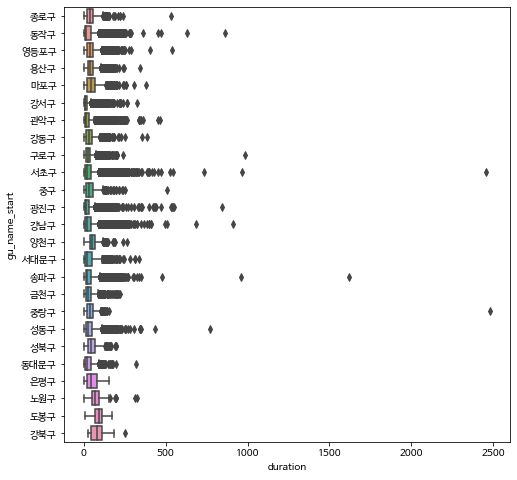

In [53]:
sns.boxplot(data=bike_nozero, x= 'duration', y='gu_name_start', orient='h')

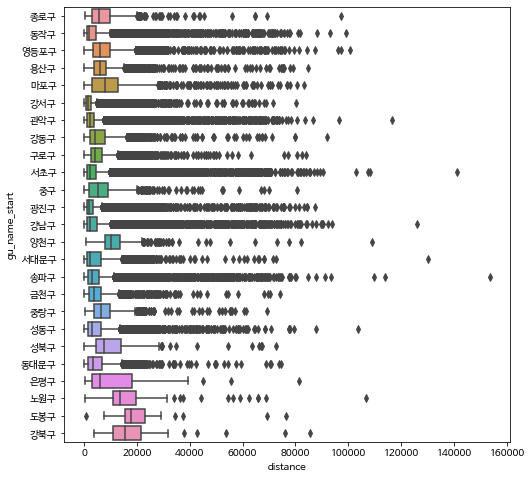

In [54]:
sns.boxplot(data=bike_nozero, x= 'distance', y='gu_name_start', orient='h')